In [1]:
# import tensorflow as tf
import tensorflow.compat.v1 as tf
import numpy as np
print(tf.__version__)


def loadGraph(modelName):
    
    dg = tf.Graph()
    with dg.as_default():
        defGraph = tf.GraphDef()

        with tf.gfile.GFile('garbage/models/' + modelName + '.pb', 'rb') as fid:
            serGraph = fid.read()
            defGraph.ParseFromString(serGraph)
            tf.import_graph_def(defGraph, name='')
        sess = tf.Session(graph = dg)
        print('Loaded graph')
        return dg, sess
    
def detect_hand(image, graph, sess):
    image_tensor=graph.get_tensor_by_name('image_tensor:0')
    detection_boxes=graph.get_tensor_by_name('detection_boxes:0')
    detection_scores=graph.get_tensor_by_name('detection_scores:0')
    detection_classes=graph.get_tensor_by_name('detection_classes:0')
    num_detections=graph.get_tensor_by_name('num_detections:0')
    
    fimage = np.expand_dims(image, axis=0)
    
    (b, s, c, n) = sess.run(
                    [detection_boxes,detection_scores,detection_classes,num_detections],
                    feed_dict={image_tensor:fimage})
    return np.squeeze(b), np.squeeze(s)


dg, sess = loadGraph('hand_detection')

2.2.0
Loaded graph


In [17]:
def show(image):
    _, ax = plt.subplots()
    ax.imshow(image)

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

cap = cv.VideoCapture(0)

imw=640
imh=480

while True:
    ret, fr = cap.read()
    color = (0,0,255)
    #filter and stuff
    fr = cv.resize(fr, (imw, imh))
    feed = fr.copy()
    feed = cv.cvtColor(feed, cv.COLOR_BGR2RGB)
    
    show = fr
    #detect hand here
    boxes, score = detect_hand(feed,dg, sess)
    
    for i in range(2):
        if score[i] > 0.2:
            (l, r, t, b) = (boxes[i][1] * imw, boxes[i][3] * imw, boxes[i][0] * imh, boxes[i][2] * imh)
            p1 = (int(l), int(t))
            p2 = (int(r), int(b))
            if(score[i]>0.7):
                color=(255,255,255)
            show = cv.rectangle(fr.copy(), p1, p2, color, 1)
            print(score[0])
            handRegion = fr[p1[1]:p2[1],p1[0]:p2[0]]
            if(handShape[0]>0 and handShape[1]>0):
                cv.imshow('hand', handRegion)
    
    #showing final output
    cv.imshow('original', fr)
    cv.imshow('final', show)
    
    
    #to stop the camera
    key = cv.waitKey(3)
    if key == 27:            
        cap.release() 
        cv.destroyAllWindows()  
        break




0.7775855
0.7775855
0.77784055
0.990072
0.990072
0.95145804
0.95145804
0.99153554
0.99328977
0.99328977
0.99498945
0.99498945
0.9926393
0.9926393
0.9948106
0.9948106
0.947399
0.947399
0.947399
0.947399
0.8800528
0.8800528
0.26902142
0.26902142
0.46953967
0.46953967
0.90564024
0.90564024
0.90564024
0.90564024
0.9931433
0.9931433
0.9931433
0.9931433
0.991085
0.991085
0.991085
0.991085
0.7135893
0.7135893
0.7135893
0.7135893
0.7893043
0.7893043
0.98604935
0.98604935
0.98604935
0.98604935
0.9903289
0.9903289
0.99349123
0.99349123
0.99349123
0.99349123
0.9956939
0.9956939
0.99621236
0.99621236
0.99621236
0.99621236
0.998519
0.998519
0.9988587
0.9988587
0.9988587
0.9988587
0.9993568
0.9993568
0.9993568
0.9993568
0.999474
0.999474
0.999474
0.999474
0.9932985
0.9837901
0.9837901
0.9837901
0.9837901
0.38888973
0.38888973
0.38888973
0.38888973
0.98893297
0.98893297
0.98893297
0.98893297
0.62237036
0.62237036
0.62237036
0.62237036
0.83743304
0.83743304
0.9939175
0.9939175
0.99960846
0.99960846
0.

0.22640643
0.2643356
0.2643356
0.23907642
0.23907642
0.36281827
0.36281827
0.33372587
0.33372587
0.36111334
0.36111334
0.24430543
0.24430543
0.31864372
0.31864372
0.55373836
0.55373836
0.5942125
0.5942125
0.35393655
0.38114473
0.38114473
0.57686496
0.57686496
0.29379383
0.29379383
0.29379383
0.29379383
0.2587561
0.2587561
0.4178942
0.4178942
0.5189023
0.60381895
0.60381895
0.48756343
0.48756343
0.8489932
0.8489932
0.8489932
0.8489932
0.7310544
0.7310544
0.7310544
0.7310544
0.7115646
0.7115646
0.7115646
0.7115646
0.78203267
0.869041
0.869041
0.50383323
0.50383323
0.20653738
0.20653738
0.5505419
0.5505419
0.90981156
0.90981156
0.941005
0.93488175
0.93488175
0.94674486
0.94674486
0.90041846
0.90041846
0.9038373
0.9038373
0.86845976
0.86845976
0.919401
0.89236283
0.89236283
0.8599437
0.8599437
0.88529503
0.88529503
0.93940514
0.93940514
0.90758395
0.90758395
0.9370626
0.96104544
0.96104544
0.980859
0.980859
0.97272044
0.97272044
0.7189004
0.7189004
0.8111328
0.8111328
0.878754
0.878754
0.4

0.99512404
0.9944088
0.9944088
0.9918976
0.9918976
0.9891929
0.9891929
0.9866859
0.9866859
0.9926484
0.9926484
0.97344357
0.97344357
0.99257433
0.99257433
0.98997176
0.98997176
0.97650003
0.97650003
0.36933357
0.36933357
0.33014137
0.33014137
0.33014137
0.33014137
0.5273063
0.5273063
0.72115344
0.72115344
0.72115344
0.72115344
0.9119101
0.9119101
0.9119101
0.9119101
0.96092355
0.96092355
0.6790663
0.6790663
0.71323466
0.71323466
0.75885886
0.75885886
0.92170525
0.92170525
0.7931013
0.7931013
0.93438065
0.93438065
0.9576116
0.9576116
0.8854958
0.8854958
0.84740597
0.84740597
0.84740597
0.84740597
0.71152174
0.71152174
0.71152174
0.71152174
0.8211801
0.8211801
0.7356243
0.7356243
0.89487773
0.89487773
0.93571633
0.93571633
0.93571633
0.93571633
0.4870385
0.4870385
0.22060692
0.22060692
0.50544375
0.50544375
0.3974451
0.3974451
0.47592866
0.47592866
0.41136718
0.41136718
0.32381454
0.32381454
0.7927309
0.7927309
0.8411758
0.8411758
0.91102916
0.91102916
0.92019814
0.92019814
0.89245284
0.

0.24267358
0.24267358
0.23672046
0.25564966
0.25367096
0.21606536
0.24990928
0.39868605
0.22654277
0.23424375
0.25490215
0.5991262
0.23331149
0.31990942
0.20415476
0.34567288
0.4144276
0.48484558
0.48484558
0.3581944
0.2003953
0.3813383
0.3813383
0.28437337
0.47316426
0.5312399
0.5312399
0.26061273
0.6668787
0.6668787
0.3852021
0.3852021
0.5184056
0.5184056
0.22128196
0.5260383
0.5260383
0.40835556
0.5170622
0.49355367
0.30958393
0.57514477
0.32085022
0.24860857
0.21578129
0.2887805
0.32158765
0.3616366
0.6010341
0.2295953
0.3831951
0.67852914
0.4528098
0.22746322
0.2333058
0.3172429
0.5624533
0.45434293
0.306796
0.40292042
0.49062294
0.50914186
0.24888113
0.24888113
0.5538412
0.29852644
0.29852644
0.26392773
0.33624798
0.25178984
0.21721183
0.220199
0.30145773
0.22064415
0.25455475
0.53729445
0.42552605
0.42552605
0.29458457
0.56796855
0.9692833
0.9016369
0.3183894
0.3183894
0.2493774
0.5242212
0.35129645
0.47055787
0.2509608
0.552401
0.552401
0.31608972
0.3191843
0.5990944
0.5016791


0.94272435
0.94272435
0.63113874
0.63113874
0.63113874
0.63113874
0.5637699
0.5637699
0.5637699
0.5637699
0.6038413
0.6038413
0.9724133
0.9724133
0.9724133
0.9724133
0.9000978
0.9000978
0.86283046
0.86283046
0.3983088
0.3983088
0.3983088
0.3983088
0.22487974
0.22487974
0.3785208
0.3785208
0.3785208
0.3785208
0.5266424
0.5266424
0.52858436
0.52858436
0.50826204
0.50826204
0.60068804
0.60068804
0.545474
0.545474
0.33402756
0.33402756
0.48569933
0.48569933
0.48569933
0.48569933
0.61658704
0.61658704
0.61658704
0.61658704
0.8008513
0.8008513
0.8008513
0.8008513
0.9096107
0.9096107
0.7326567
0.7326567
0.75810295
0.75810295
0.5805367
0.5805367
0.6784445
0.6784445
0.4964006
0.4964006
0.73256266
0.73256266
0.73256266
0.73256266
0.80933815
0.80933815
0.91274303
0.91274303
0.44683224
0.44683224
0.20717959
0.20717959
0.20530371
0.20530371
0.24625722
0.24625722
0.27064243
0.27064243
0.23417549
0.5144558
0.5144558
0.85525256
0.85525256
0.82055247
0.82055247
0.92919606
0.8892942
0.8892942
0.8898863


In [49]:
def show(image):
    _, ax = plt.subplots()
    ax.imshow(image)

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# dg, sess = loadGraph('hand_detection')
cap = cv.VideoCapture(0)
kernelSize=(3,3)
imw=640
imh=480

while True:
    ret, fr = cap.read()
    
    #filter and stuff
    frame = cv.cvtColor(fr.copy(), cv.COLOR_BGR2HSV)
#     median = cv.GaussianBlur(fr.copy(), kernelSize,0)
#     medianhsv = cv.cvtColor(median.copy(), cv.COLOR_BGR2HSV)
    low = np.array([-40, 0, 0])
    high = np.array([40, 245, 245])
    fil = cv.inRange(frame, low, high)
    
    
    #expriment here
    final = cv.bitwise_and(fr.copy(), fr.copy(), mask=fil)
    
    #showing final output
    cv.imshow('blurred', frame)
    cv.imshow('final', final)
    cv.imshow('filter', fil)
    
    #to stop the camera
    key = cv.waitKey(3)
    if key == 27:           
        cap.release() 
        cv.destroyAllWindows()  
        break




In [7]:
import numpy as np
import cv2 as cv

imw=640
imh=480

cap = cv.VideoCapture(0)
low = np.array([-30, 0, 0])
high = np.array([40, 255, 255])

while True:
    ret, fr = cap.read()
    fr=cv.resize(fr, (imw, imh))
    
    #filter and stuff
    frame = cv.cvtColor(fr.copy(), cv.COLOR_BGR2HSV)
    fil = cv.inRange(frame, low, high)

    
    #expriment here
#     fil = cv.dilate(fil, None, iterations=5)
    feed = cv.bitwise_and(fr.copy(), fr.copy(), mask=fil)
    
    #detect hand here
    boxes, score = detect_hand(feed, dg, sess)
    
    for i in range(2):
        if(score[i] > 0.2):
            (l, r, t, b) = (boxes[i][1] * imw, boxes[i][3] * imw, boxes[i][0] * imh, boxes[i][2] * imh)
            p1 = (int(l), int(t))
            p2 = (int(r), int(b))
            color = (255,0,0)
            if(score[i]>0.8):
                color=(255,255,255)
            showB = cv.rectangle(fr.copy(), p1, p2, color, 1)
            print(score[0])
            handRegion = fr[p1[1]:p2[1],p1[0]:p2[0]]
            handShape=handRegion.shape
            if(handShape[0]>0 and handShape[1]>0):
                cv.imshow('hand', handRegion)
            
    else:
        show = fr.copy()
    
    #showing final output
    cv.imshow('original', showB)
    cv.imshow('feed', feed)
    cv.imshow('filter', fil)
    
    #to stop the camera
    key = cv.waitKey(3)
    if key == 27:           
        cap.release() 
        cv.destroyAllWindows()  
        break

0.53830403
0.38157704
0.37076235
0.37076235
0.37076235
0.37076235
0.524019
0.7855482
0.7855482
0.63210815
0.82555807
0.82555807
0.27639252
0.27639252
0.27639252
0.27639252
0.65293
0.65293
0.65293
0.65293
0.9928067
0.9946563
0.9946563
0.9981693
0.9981693
0.5605433
0.5605433
0.9141602
0.9141602
0.2946808
0.2946808
0.96606886
0.71464753
0.71464753
0.9704742
0.9704742
0.9704742
0.9704742
0.9915935
0.91814923
0.91814923
0.91814923
0.91814923
0.72799957
0.72799957
0.72799957
0.72799957
0.9773566
0.9773566
0.8776933
0.8776933
0.8776933
0.8776933
0.98116195
0.98116195
0.7784874
0.7784874
0.7784874
0.7784874
0.91298646
0.91298646
0.91298646
0.91298646
0.88313055
0.88313055
0.88313055
0.88313055
0.8688216
0.8688216
0.93174744
0.93174744
0.93174744
0.93174744
0.94452935
0.94452935
0.94452935
0.94452935
0.5346877
0.5346877
0.5346877
0.5346877
0.8989604
0.8989604
0.95863265
0.95863265
0.95863265
0.95863265
0.6529928
0.6529928
0.5770794
0.5770794
0.5770794
0.5770794
0.6547286
0.6547286
0.6547286
0.6

In [26]:
import tensorflow as tf
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

interpreter = tf.lite.Interpreter(model_path='garbage/models/hand_landmark.tflite')

interpreter.allocate_tensors()

indet = interpreter.get_input_details()
outdet = interpreter.get_output_details()
tensors = interpreter.get_tensor_details()

inshape = indet[0]['shape']
for i in range(len(tensors)):
    print(tensors[i]['name'])

input_1
conv2d/Kernel
conv2d/Bias
conv2d
p_re_lu/Alpha
p_re_lu
conv2d_1/Kernel
conv2d_1/Bias
conv2d_1
p_re_lu_1/Alpha
p_re_lu_1
depthwise_conv2d/Kernel
depthwise_conv2d/Bias
depthwise_conv2d
conv2d_2/Kernel
conv2d_2/Bias
conv2d_2
add
p_re_lu_2/Alpha
p_re_lu_2
conv2d_3/Kernel
conv2d_3/Bias
conv2d_3
p_re_lu_3/Alpha
p_re_lu_3
depthwise_conv2d_1/Kernel
depthwise_conv2d_1/Bias
depthwise_conv2d_1
conv2d_4/Kernel
conv2d_4/Bias
conv2d_4
add_1
p_re_lu_4/Alpha
p_re_lu_4
conv2d_5/Kernel
conv2d_5/Bias
conv2d_5
p_re_lu_5/Alpha
p_re_lu_5
depthwise_conv2d_2/Kernel
depthwise_conv2d_2/Bias
depthwise_conv2d_2
conv2d_6/Kernel
conv2d_6/Bias
conv2d_6
add_2
p_re_lu_6/Alpha
p_re_lu_6
conv2d_7/Kernel
conv2d_7/Bias
conv2d_7
p_re_lu_7/Alpha
p_re_lu_7
depthwise_conv2d_3/Kernel
depthwise_conv2d_3/Bias
depthwise_conv2d_3
conv2d_8/Kernel
conv2d_8/Bias
conv2d_8
add_3
p_re_lu_8/Alpha
p_re_lu_8
conv2d_9/Kernel
conv2d_9/Bias
conv2d_9
p_re_lu_9/Alpha
p_re_lu_9
depthwise_conv2d_4/Kernel
depthwise_conv2d_4/Bias
depthwise_

conv2d_114/Kernel
conv2d_114/Bias
conv2d_114
add_56
p_re_lu_114/Alpha
p_re_lu_114
conv2d_115/Kernel
conv2d_115/Bias
conv2d_115
p_re_lu_115/Alpha
p_re_lu_115
depthwise_conv2d_57/Kernel
depthwise_conv2d_57/Bias
depthwise_conv2d_57
conv2d_116/Kernel
conv2d_116/Bias
conv2d_116
add_57
p_re_lu_116/Alpha
p_re_lu_116
conv2d_117/Kernel
conv2d_117/Bias
conv2d_117
p_re_lu_117/Alpha
p_re_lu_117
depthwise_conv2d_58/Kernel
depthwise_conv2d_58/Bias
depthwise_conv2d_58
conv2d_118/Kernel
conv2d_118/Bias
conv2d_118
add_58
p_re_lu_118/Alpha
p_re_lu_118
conv2d_119/Kernel
conv2d_119/Bias
conv2d_119
p_re_lu_119/Alpha
p_re_lu_119
depthwise_conv2d_59/Kernel
depthwise_conv2d_59/Bias
depthwise_conv2d_59
conv2d_120/Kernel
conv2d_120/Bias
conv2d_120
add_59
p_re_lu_120/Alpha
p_re_lu_120
conv2d_121/Kernel
conv2d_121/Bias
conv2d_121
p_re_lu_121/Alpha
p_re_lu_121
depthwise_conv2d_60/Kernel
depthwise_conv2d_60/Bias
depthwise_conv2d_60
conv2d_122/Kernel
conv2d_122/Bias
conv2d_122
add_60
p_re_lu_122/Alpha
p_re_lu_122
co

In [4]:
hand = cv.imread('garbage/hand5.png')
print(inshape)
hand=cv.resize(hand, (256,256))

hand = hand.astype(np.float32)
hand /= 255
hand = [hand]
# plt.imshow(hand)

interpreter.set_tensor(indet[0]['index'], hand)

interpreter.invoke()
feed = hand.astype(np.float32)

outputdata = interpreter.get_tensor(outdet[0]['index'])

ot = interpreter.get_tensor(outdet[1]['index'])
od = np.squeeze(outputdata)
print(od.shape)
 
show = hand[0].copy()

show *= 255
show = show.astype(np.int16)
for i in range(21):
    show = cv.circle(show, (od[i*2],od[i*2+1]), 1, (255,255,255))
    
plt.imshow(show)

NameError: name 'inshape' is not defined

In [1]:
#speecific version

#Tensorflow - 1.13.1 and python 3.7.3

import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
palm = tf.lite.Interpreter('garbage/models/palm_detector.tflite')

palm.allocate_tensors()
indet = palm.get_input_details()
outdet = palm.get_output_details()
tensors = palm.get_tensor_details()
ten = palm.get_tensor_details()

for i in range(len(ten)):
    print(ten[i]['name'])

Const
Const_1
Const_2
add_39/add
add_41/add
classificator_16/BiasAdd
classificator_16/Conv2D_bias
classificator_16/kernel
classificator_32/BiasAdd
classificator_32/Conv2D_bias
classificator_32/kernel
classificator_8/BiasAdd
classificator_8/Conv2D_bias
classificator_8/kernel
classificators/concat
conv2d/Conv2D_bias
conv2d/kernel
conv2d_1/BiasAdd
conv2d_1/Conv2D_bias
conv2d_1/kernel
conv2d_10/BiasAdd
conv2d_10/Conv2D_bias
conv2d_10/kernel
conv2d_11/BiasAdd
conv2d_11/Conv2D_bias
conv2d_11/kernel
conv2d_12/BiasAdd
conv2d_12/Conv2D_bias
conv2d_12/kernel
conv2d_13/BiasAdd
conv2d_13/Conv2D_bias
conv2d_13/kernel
conv2d_14/BiasAdd
conv2d_14/Conv2D_bias
conv2d_14/kernel
conv2d_15/BiasAdd
conv2d_15/Conv2D_bias
conv2d_15/kernel
conv2d_16/BiasAdd
conv2d_16/Conv2D_bias
conv2d_16/kernel
conv2d_17/BiasAdd
conv2d_17/Conv2D_bias
conv2d_17/kernel
conv2d_18/BiasAdd
conv2d_18/Conv2D_bias
conv2d_18/kernel
conv2d_19/BiasAdd
conv2d_19/Conv2D_bias
conv2d_19/kernel
conv2d_2/BiasAdd
conv2d_2/Conv2D_bias
conv2d_2

In [2]:
hand = cv.imread('garbage/p.png')
hand = cv.resize(hand, (256, 256))
feed = hand.astype(np.float32)
feed/=255
feed=[feed]

palm.set_tensor(indet[0]['index'], feed)
palm.invoke()

od=palm.get_tensor(outdet[0]['index'])
od1=palm.get_tensor(outdet[1]['index'])
# data=palm.get_tensor(ten[371]['index'])
print(od)
print(od1)

[[[  4.0507936   3.5295243  26.504625  ...   4.995505   12.169582
     8.5911875]
  [  4.214871    4.4951186  29.030636  ...   6.425703   13.564865
     9.765781 ]
  [  1.2182239   3.6951838  20.958433  ...   5.446135    9.671838
     9.955075 ]
  ...
  [-20.477568   -4.2640166 127.365875  ...   4.402922    7.5552106
     0.3726884]
  [ -5.837653    7.871705  116.7394    ...  39.568596   13.705743
     6.073621 ]
  [ -1.9687712   3.3432555  -2.7372286 ...  -5.1962433   1.3093042
    10.256069 ]]]
[[[-14.030068]
  [ -8.937454]
  [-28.677864]
  ...
  [-32.54414 ]
  [-31.92602 ]
  [-31.451422]]]


In [12]:
print(od[0,2563])

[  5.4343705   20.627745   162.39017    163.60968    -15.636503
  -2.8874826   36.308197    34.367573    18.644794    36.7608
  -0.34088942  41.402515   -13.028259    42.567875     4.1018696
 -19.658134    30.783865     6.398403  ]


In [86]:
import pandas as pd 


anchors = pd.read_csv('garbage/anchors.csv')
print(anchors.shape)

def _sigm(x):
    return 1/(1+np.exp(-x))

score = od1[0,1:]
box = od[0,1:]
print(box.shape)
print(score.shape)
mask = _sigm(score)>0.7
mask = np.reshape(mask, mask.shape[0])
print(mask.shape)

pa = anchors[mask]
pb = box[mask]
ps = score[mask]


wid = np.argmax(pb[0:3])

x, y, w, h = pb[wid, :4]

center_offset=pa[wid, :2]*256

keypoints=center_offset+pb[4:].reshape(-1,2)
side = max(w,h)*1.5



(2943, 4)
(2943, 18)
(2943, 1)
(2943,)
3


C:\Users\Assessioner\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


In [1]:
import csv
import cv2
import numpy as np
import tensorflow as tf

class HandTracker():
    r"""
    Class to use Google's Mediapipe HandTracking pipeline from Python.
    So far only detection of a single hand is supported.
    Any any image size and aspect ratio supported.

    Args:
        palm_model: path to the palm_detection.tflite
        joint_model: path to the hand_landmark.tflite
        anchors_path: path to the csv containing SSD anchors
    Ourput:
        (21,2) array of hand joints.
    Examples::
        >>> det = HandTracker(path1, path2, path3)
        >>> input_img = np.random.randint(0,255, 256*256*3).reshape(256,256,3)
        >>> keypoints, bbox = det(input_img)
    """

    def __init__(self, palm_model, joint_model, anchors_path,
                box_enlarge=1.5, box_shift=0.2):
        self.box_shift = box_shift
        self.box_enlarge = box_enlarge

        self.interp_palm = tf.lite.Interpreter(palm_model)
        self.interp_palm.allocate_tensors()
        self.interp_joint = tf.lite.Interpreter(joint_model)
        self.interp_joint.allocate_tensors()

        # reading the SSD anchors
        with open(anchors_path, "r") as csv_f:
            self.anchors = np.r_[
                [x for x in csv.reader(csv_f, quoting=csv.QUOTE_NONNUMERIC)]
            ]
        # reading tflite model paramteres
        output_details = self.interp_palm.get_output_details()
        input_details = self.interp_palm.get_input_details()

        self.in_idx = input_details[0]['index']
        self.out_reg_idx = output_details[0]['index']
        self.out_clf_idx = output_details[1]['index']

        self.in_idx_joint = self.interp_joint.get_input_details()[0]['index']
        self.out_idx_joint = self.interp_joint.get_output_details()[0]['index']

        # 90° rotation matrix used to create the alignment triangle
        self.R90 = np.r_[[[0,1],[-1,0]]]

        # trianlge target coordinates used to move the detected hand
        # into the right position
        self._target_triangle = np.float32([
                        [128, 128],
                        [128,   0],
                        [  0, 128]
                    ])
        self._target_box = np.float32([
                        [  0,   0, 1],
                        [256,   0, 1],
                        [256, 256, 1],
                        [  0, 256, 1],
                    ])

    def _get_triangle(self, kp0, kp2, dist=1):
        """get a triangle used to calculate Affine transformation matrix"""

        dir_v = kp2 - kp0
        dir_v /= np.linalg.norm(dir_v)

        dir_v_r = dir_v @ self.R90.T
        return np.float32([kp2, kp2+dir_v*dist, kp2 + dir_v_r*dist])

    @staticmethod
    def _triangle_to_bbox(source):
        # plain old vector arithmetics
        bbox = np.c_[
            [source[2] - source[0] + source[1]],
            [source[1] + source[0] - source[2]],
            [3 * source[0] - source[1] - source[2]],
            [source[2] - source[1] + source[0]],
        ].reshape(-1,2)
        return bbox

    @staticmethod
    def _im_normalize(img):
         return np.ascontiguousarray(2 * ((img / 255) - 0.5).astype('float32'))

    @staticmethod
    def _sigm(x):
        return 1 / (1 + np.exp(-x) )

    @staticmethod
    def _pad1(x):
        return np.pad(x, ((0,0),(0,1)), constant_values=1, mode='constant')


    def predict_joints(self, img_norm):
        self.interp_joint.set_tensor(
            self.in_idx_joint, img_norm.reshape(1,256,256,3))
        self.interp_joint.invoke()

        joints = self.interp_joint.get_tensor(self.out_idx_joint)
        return joints.reshape(-1,2)

    def detect_hand(self, img_norm):
        assert -1 <= img_norm.min() and img_norm.max() <= 1,\
        "img_norm should be in range [-1, 1]"
        assert img_norm.shape == (256, 256, 3),\
        "img_norm shape must be (256, 256, 3)"

        # predict hand location and 7 initial landmarks
        self.interp_palm.set_tensor(self.in_idx, img_norm[None])
        self.interp_palm.invoke()

        out_reg = self.interp_palm.get_tensor(self.out_reg_idx)[0]
        out_clf = self.interp_palm.get_tensor(self.out_clf_idx)[0,:,0]
        
        
        # finding the best prediction
        # TODO: replace it with non-max suppression
        detecion_mask = self._sigm(out_clf) > 0.7
        candidate_detect = out_reg[detecion_mask]
        candidate_anchors = self.anchors[detecion_mask]
        ar=[]
        for i in range(len(detecion_mask)):
            if(detecion_mask[i]):
                ar.append(i)
        
        if candidate_detect.shape[0] == 0:
            print("No hands found")
            return None, None
        # picking the widest suggestion while NMS is not implemented
        max_idx = np.argmax(candidate_detect[:, 3])

        # bounding box offsets, width and height
        dx,dy,w,h = candidate_detect[max_idx, :4]
        center_wo_offst = candidate_anchors[max_idx,:2] * 256
#         print('one with max prob')
#         print(candidate_detect[max_idx])
        
        # 7 initial keypoints
        keypoints = center_wo_offst + candidate_detect[max_idx,4:].reshape(-1,2)
        side = max(w,h) * self.box_enlarge

        # now we need to move and rotate the detected hand for it to occupy a
        # 256x256 square
        # line from wrist keypoint to middle finger keypoint
        # should point straight up
        # TODO: replace triangle with the bbox directly
        source = self._get_triangle(keypoints[0], keypoints[2], side)
        source -= (keypoints[0] - keypoints[2]) * self.box_shift
#         print(source)
#         print(keypoints)
        return source, keypoints

    def preprocess_img(self, img):
        # fit the image into a 256x256 square
        shape = np.r_[img.shape]
        pad = (shape.max() - shape[:2]).astype('uint32') // 2
        img_pad = np.pad(
            img,
            ((pad[0],pad[0]), (pad[1],pad[1]), (0,0)),
            mode='constant')
        img_small = cv2.resize(img_pad, (256, 256))
        img_small = np.ascontiguousarray(img_small)

        img_norm = self._im_normalize(img_small)
        return img_pad, img_norm, pad


    def __call__(self, img):
        img_pad, img_norm, pad = self.preprocess_img(img)

        st=time.time()
        source, keypoints = self.detect_hand(img_norm)
        end = time.time()
#         print('detection time: ' + str(end-start))
        if source is None:
            return None, None, None

        # calculating transformation from img_pad coords
        # to img_landmark coords (cropped hand image)
        scale = max(img.shape) / 256
#         print(source)
#         print(source*scale)
        Mtr = cv2.getAffineTransform(
            source * scale,
            self._target_triangle
        )
#         print('scale',scale)
#         print('source*scale',source*scale)
#         print('Mtr',Mtr)
#         print('mtr')
#         print(Mtr)
#         cv2.imshow('imagefrag', Mtr)
#         cv2.waitKey(0)
        padd=self._im_normalize(img_pad)
#         print('padd')
#         print(padd)
        img_landmark = cv2.warpAffine(
            padd, Mtr, (256,256)
        )
#         cv2.imshow('lm', img_landmark)
        #predict the landmarks from given 256x256 image of hand portion
        joints = self.predict_joints(img_landmark)

        # adding the [0,0,1] row to make the matrix square
        Mtr = self._pad1(Mtr.T).T
        Mtr[2,:2] = 0

        Minv = np.linalg.inv(Mtr)

        # projecting keypoints back into original image coordinate space
#         print('joints',joints)
        kp_orig = (self._pad1(joints) @ Minv.T)[:,:2]
#         print('pad with joints',self._pad1(joints))
#         print('keypoints',kp_orig)
        box_orig = (self._target_box @ Minv.T)[:,:2]
        kp_orig -= pad[::-1]
        box_orig -= pad[::-1]
        
        return kp_orig, box_orig, img_landmark
    


In [9]:
import cv2 as cv
import time
from math import atan2,cos,sin
# import win32api as win
#Press y to save coordinate
WINDOW = "Hand Tracking"
PALM_MODEL_PATH = "garbage/models/palm_detector.tflite"
LANDMARK_MODEL_PATH = "garbage/models/hand_landmark.tflite"
ANCHORS_PATH = "garbage/anchors.csv"

POINT_COLOR = (0, 255, 0)
CONNECTION_COLOR = (255, 0, 0)
THICKNESS = 2

cv2.namedWindow(WINDOW)
# cv2.namedWindow('keypoints')
capture = cv2.VideoCapture(0)

if capture.isOpened():
    hasFrame, frame = capture.read()
    frame = cv.flip(frame,1)
    forcomp=frame
else:
    hasFrame = False

#        8   12  16  20
#        |   |   |   |
#        7   11  15  19
#    4   |   |   |   |
#    |   6   10  14  18
#    3   |   |   |   |
#    |   5---9---13--17
#    2    \         /
#     \    \       /
#      1    \     /
#       \    \   /
#        ------0-
connections = [
    (0, 1), (1, 2), (2, 3), (3, 4),
    (5, 6), (6, 7), (7, 8),
    (9, 10), (10, 11), (11, 12),
    (13, 14), (14, 15), (15, 16),
    (17, 18), (18, 19), (19, 20),
    (0, 5), (5, 9), (9, 13), (13, 17), (0, 17)
]

detector = HandTracker(
    PALM_MODEL_PATH,
    LANDMARK_MODEL_PATH,
    ANCHORS_PATH,
    box_shift=0.2,
    box_enlarge=1.2
)
rotateit = lambda point: (int(point[0]*cos(ar)-point[1]*sin(ar)),int(point[0]*sin(ar)+point[1]*cos(ar)))
c = []
counter = 0
reqlen = 0.2
while hasFrame:
#     cv.imshow('prevframe',forcomp)
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
#     b=-1
#     start = time.time()
    points, box, source = detector(image)
#     end = time.time()
#     print(end-start)
    black = np.zeros(image.shape, np.int8)
    f=True
    if points is not None:
        
        p, q, r, s = box
        p1, p2 = int(p[0]), int(p[1])

        r1, r2 = int(r[0]), int(r[1])
        
#         cv2.circle(black, (int(points[8][0]), int(points[8][1])), THICKNESS * 2, (65,123,23), THICKNESS)
        for point in points:
            x, y = point
            cv2.circle(frame, (int(x), int(y)), THICKNESS * 2, POINT_COLOR, THICKNESS)
#             cv2.circle(black, (int(x), int(y)), THICKNESS * 2, POINT_COLOR, THICKNESS)
            if(f):
#                 cv2.circle(black, (int(x), int(y)), THICKNESS * 2 + 3, (0,0,255), THICKNESS+3)
                f=False
#         npts = points*0.5
#         le = abs(points[12] - points[0])
#         print(le)
#         le = le[1]/frame.shape[1]
#         print(le)
#         fac = reqlen/le
#         print(fac)
#         npts=points.copy()
#         for pt in npts:
#             x, y = pt
#             cv2.circle(black, (int(x), int(y)), THICKNESS , (0,0,255), THICKNESS)
        for connection in connections:
            x0, y0 = points[connection[0]]
            x1, y1 = points[connection[1]]
            cv2.line(frame, (int(x0), int(y0)), (int(x1), int(y1)), CONNECTION_COLOR, THICKNESS)
#             cv2.line(black, (int(x0), int(y0)), (int(x1), int(y1)), CONNECTION_COLOR, THICKNESS)
#         show the prediction on screen
#         st = time.time()
#         feed = fitIn(points, 130, False)
#         feed = np.reshape(feed, (42))
#         feed = np.expand_dims(feed, axis=0)
#         print(feed.shape)
#         print(feed)
#         inter.allocate_tensors()

#         inter.set_tensor(inp[0]['index'], feed)
#         inter.invoke()
#         res = inter.get_tensor(out[0]['index'])
        
#         res = model.predict(feed)
#         print(res)
#         text = ClassToText(np.argmax(res))
#         end = time.time()
#         print('gesture recog time ' + str(end-st))
#         cv.putText(frame, text, (50,50), cv.FONT_HERSHEY_SIMPLEX, 2, (0,0,255), 3)
#         print(b)

        p1,p2 = points[8].astype('int32')
        q1,q2 = points[7].astype('int32')
        dist = abs(p2-q2)
        shift = dist/4
        rot = atan2(q2-p2,q1-p1)
#         print('angle  ',rot*180/np.pi)
#         print(dist)
#         pt1 =rx1,ry1 = int(p1-shift),int(p2-shift)
#         pt2 =rx2,ry2 = int(p1+shift),int(p2-shift)
#         pt3 =rx3,ry3 = int(q1-shift),int(q2+shift)
#         pt4 =rx4,ry4 = int(q1+shift),int(q2+shift)
#         ar = rot-np.pi
        
#         pt1 = rotateit(pt1)

#         pt1 = int(rx1*cos(rot)-ry1*sin(rot)),int(rx1*sin(rot)+ry1*cos(rot))
#         pt2 = int(rx2*cos(rot)-ry2*sin(rot)),int(rx2*sin(rot)+ry2*cos(rot))
#         pt3 = int(rx3*cos(rot)-ry3*sin(rot)),int(rx3*sin(rot)+ry3*cos(rot))
#         pt4 = int(rx4*cos(rot)-ry4*sin(rot)),int(rx4*sin(rot)+ry4*cos(rot))
#         print(pt1, pt2, pt3, pt4)
#         cv.circle(frame, pt1, 2, (255,255,0),2)
#         cv.circle(frame, pt2, 2, (255,255,0),2)
#         cv.circle(frame, pt3, 2, (255,255,0),2)
#         cv.circle(frame, pt4, 2, (255,255,0),2)
#         cv2.rectangle(frame, pt1, pt2, (0,0,255), 1)
        
    cv2.imshow(WINDOW, frame)
#     if source is not None:
    cv2.imshow('keypoints',black)
#     print(li)
#     s=np.average(framediff)
    hasFrame, frame = capture.read()
    frame = cv.flip(frame,1)
#     %timeit -n1 -r1 print('diff: ' ,diff(frame.copy()/255, forcomp.copy()/255))
    key = cv2.waitKey(1)
    if key == 121:
        c.append(points);
        print('coords added')
    if key == 27:
        break
#     forcomp = frame.copy()
#     counter+=1
capture.release()
cv2.destroyAllWindows()

# feed = fitIn(c[0], 130, False)
# showAll([feed])
# feed = feed.flatten()
# feed = np.expand_dims(feed, axis=0)
# res = mod.predict(feed)
# print(res)

C:\Users\Assessioner\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:93: RuntimeWarning: overflow encountered in exp


In [11]:
import cv2 as cv
import time
from math import atan2,cos,sin
# import win32api as win
#Press y to save coordinate
WINDOW = "Hand Tracking"
PALM_MODEL_PATH = "garbage/models/palm_detector.tflite"
LANDMARK_MODEL_PATH = "garbage/models/hand_landmark.tflite"
ANCHORS_PATH = "garbage/anchors.csv"

POINT_COLOR = (0, 255, 0)
CONNECTION_COLOR = (255, 0, 0)
THICKNESS = 2

cv2.namedWindow(WINDOW)
# cv2.namedWindow('keypoints')
capture = cv2.VideoCapture(0)

if capture.isOpened():
    hasFrame, frame = capture.read()
    frame = cv.flip(frame,1)
    forcomp=frame
else:
    hasFrame = False

#        8   12  16  20
#        |   |   |   |
#        7   11  15  19
#    4   |   |   |   |
#    |   6   10  14  18
#    3   |   |   |   |
#    |   5---9---13--17
#    2    \         /
#     \    \       /
#      1    \     /
#       \    \   /
#        ------0-
connections = [
    (0, 1), (1, 2), (2, 3), (3, 4),
    (5, 6), (6, 7), (7, 8),
    (9, 10), (10, 11), (11, 12),
    (13, 14), (14, 15), (15, 16),
    (17, 18), (18, 19), (19, 20),
    (0, 5), (5, 9), (9, 13), (13, 17), (0, 17)
]

detector = HandTracker(
    PALM_MODEL_PATH,
    LANDMARK_MODEL_PATH,
    ANCHORS_PATH,
    box_shift=0.2,
    box_enlarge=1.2
)
rotateit = lambda point: (int(point[0]*cos(ar)-point[1]*sin(ar)),int(point[0]*sin(ar)+point[1]*cos(ar)))
handlandmarks = []
counter = 0
reqlen = 0.2
while hasFrame:
#     cv.imshow('prevframe',forcomp)
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
#     b=-1
#     start = time.time()
    points, box, source = detector(image)
#     end = time.time()
#     print(end-start)
    black = np.zeros(image.shape, np.int8)
    f=True
    if points is not None:
        
        for point in points:
            x, y = point
            cv2.circle(frame, (int(x), int(y)), THICKNESS * 2, POINT_COLOR, THICKNESS)

        for connection in connections:
            x0, y0 = points[connection[0]]
            x1, y1 = points[connection[1]]
            cv2.line(frame, (int(x0), int(y0)), (int(x1), int(y1)), CONNECTION_COLOR, THICKNESS)
        
    cv2.imshow(WINDOW, frame)
    hasFrame, frame = capture.read()
    frame = cv.flip(frame,1)
    key = cv2.waitKey(1)
    if key == 121:
        handlandmarksmarks.append(points)
        print('coords added')
    if key == 27:
        break
capture.release()
cv2.destroyAllWindows()


C:\Users\Assessioner\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:93: RuntimeWarning: overflow encountered in exp


(21, 2)
(21, 2)
(21, 2)
(21, 2)


In [46]:
from numba import jit, cuda
import random
import time


def diff(frame, prevframe):
    acc = 0
    r=g=b=0
    w,h,c = frame.shape
    for i in range(w*h):
        x = i%w
        y = int(i/h)
        fr=frame[x][y][0]
        sr=prevframe[x][y][0]
        fg=frame[x][y][1]
        sg=prevframe[x][y][1]
        fb=frame[x][y][2]
        sb=prevframe[x][y][2]
        r = r + (abs(fr-sr))
        g = g + (abs(fg-sg))
        b = b + (abs(fb-sb))
    total = w*h*c
    r/=total
    g/=total
    b/=total
    
    return (r+g+b)/3


def tr(kps, fac):
    
    xmin = np.min(kps[:,0])
    ymin = np.min(kps[:,1])
    kps[:,0]-=xmin
    kps[:,1]-=ymin
    kps *= fac
    kps[:,0]+=xmin
    kps[:,1]+=ymin
    
    return kps
    
# import cv2 as cv
# import time 

# if __name__ == '__main__':
#     cap = cv.VideoCapture(0)
#     pf = cap.read()[1]
#     factor=4
#     size = int(pf.shape[1]/factor),int(pf.shape[0]/factor)
#     print(size)
#     pf = cv.resize(pf, size)
#     pd = 25
#     t = 0
#     c = 0
#     velthresh=6
#     st = time.time()
#     while True:
#         _,cf = cap.read()
#         cf = cv.resize(cf,size)
#         cd=diff(pf,cf)
#         pf = cf.copy()
#         end = time.time()
#         dt = abs(end-st)
#         dd = abs(cd-pd)
#         v=dd/dt
#         t+=v
#         c+=1
#         print(t/c)
#         st = time.time()
#         if v < velthresh:
#             cf=cv.putText(cf, 'steady', (30,30), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 1)
# #         print(tim)
        
#         cv.imshow('curret', cf)
#         cv.imshow('previous', pf)
#         pd = cd
#         key = cv.waitKey(5)
#         if key ==27:
#             break
#     cv.destroyAllWindows()
#     cap.release()

In [2]:
import tensorflow as tf
inter = tf.lite.Interpreter('garbage/models/gesture2.tflite')
inp = inter.get_input_details()
out = inter.get_output_details()
inter.allocate_tensors()

In [82]:
from tensorflow.keras.models import load_model

model = load_model('garbage/models/gesture_3')

In [73]:
#predictions are wrong for 4, superman

# al=[]
# fin=[]
# rad=np.pi/2
# for i in range(len(c)):
#     for j in range(4):
#         fin.append(rotate(c[i], rad*j))
    
# final = []
# for lm in fin:
#     final.append(fitIn(lm, 130, True))   
# showAll(final)


import pandas as pd
lm=pd.read_csv('garbage/feed/original.csv').to_numpy()
print(lm.shape)
f=[]
for i in lm:
    f.append(np.reshape(i, (21,2)))
showAll(f)

# 1) take sample of each coordinate 
# 2) apply function rotate
# 3) apply fitIn on each rotate()
# 4) Normalize coordinates (shape=frame size) if it improves result



(9, 42)


In [338]:
#load trainx
trainx = pd.read_csv('garbage/feed/finalfeed.csv').to_numpy()
print(trainx.shape)

#load trainy
trainy = pd.read_csv('garbage/feed/finalfeedoutput.csv').to_numpy().flatten()
print(trainy.shape)

(64800, 42)
(64800,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


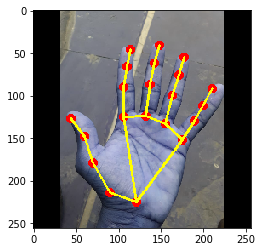

In [4]:
import matplotlib.pyplot as plt

input_image = gestures[15]

feed = preprocess(input_image)
# plt.imshow(feed[0])
data = run_inference(feed)
# print(data)
final = feed[0]

for i in range(21):  
    final = cv.circle(final, (data[i*2], data[i*2+1]), 3, (255,0,0), 3)
for connection in connections:
    x0, y0 = data[connection[0]*2],data[connection[0]*2+1]
    x1, y1 = data[connection[1]*2],data[connection[1]*2+1]
    cv.line(final, (int(x0), int(y0)), (int(x1), int(y1)), (255,255,0), 2)
plt.imshow(final)

In [63]:
import time

cv.namedWindow('demo')

for image in gestures:
    
    input_image = image
    feed = preprocess(input_image)
    data = run_inference(feed)
    final = feed[0]
    
    for i in range(21):  
        final = cv.circle(final, (data[i*2],data[i*2+1]), 3, (255,0,0), 3)
    for connection in connections:
        x0, y0 = data[connection[0]*2],data[connection[0]*2+1]
        x1, y1 = data[connection[1]*2],data[connection[1]*2+1]
        cv.line(final, (int(x0), int(y0)), (int(x1), int(y1)), (255,255,0), 2)

    cv.imshow('demo', final)
    code=cv.waitKey(0)
#     print(code)
    
cv.destroyAllWindows()

In [173]:
import os
root = 'garbage\ges'
images = []
for file in os.listdir(root):
    if file.endswith('.jpeg'):
        path = os.path.join(root,file)
        img = cv.imread(path)
        images.append(img)
        
print(len(images))

19


In [60]:
import pandas as pd
import keras.utils as util
import numpy as np

#load trainx
trainx = pd.read_csv('garbage/feed/finalfeed2.csv').to_numpy()
print(trainx.shape)
trainx = trainx.astype(np.float32)

(259200, 42)


In [74]:
print(trainx[0])
m=[]
for i in range(18):
    m.append(np.reshape(trainx[i*14400+9846], (21,2)))
    
showAll(m, (480,640,3))

[ 48.25594   249.04433   101.95953   231.00638   125.87494   182.86163
 140.1108    150.78773   123.40205   127.66738    94.64459   118.943886
 114.59962    68.5593    126.59529    34.416027  126.95618     6.3287606
  69.812294  118.03771    75.5593     76.55133    88.89664   122.87226
 102.52519   150.55858    35.906578  138.94312    44.55507    96.69571
  67.20263   137.38124    80.216064  171.64787     1.7487777 153.82227
  14.187878  130.50717    40.530056  152.8817     57.473724  174.47441  ]


In [33]:
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import Input
from tensorflow.keras import Model
import pandas as pd
import numpy as np

classes = 9
ipshape =  (42,)

ip = Input(shape=ipshape)
x = Dense(32, activation='relu')(ip)
x = Dense(64, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
op = Dense(classes, activation='softmax')(x)
model = Model(inputs = ip, outputs=op)
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

trainx, trainy = generateSamples('garbage/feed/original2.csv')

model.fit(trainx, trainy, batch_size=10000, epochs=8)

1296
259200
Epoch 1/8
26/26 [==============================] - 2s 79ms/step - loss: 4.2288 - accuracy: 0.1870
Epoch 2/8
26/26 [==============================] - 2s 62ms/step - loss: 1.5636 - accuracy: 0.4142
Epoch 3/8
26/26 [==============================] - 2s 63ms/step - loss: 0.7205 - accuracy: 0.7041
Epoch 4/8
26/26 [==============================] - 2s 65ms/step - loss: 0.3233 - accuracy: 0.8679
Epoch 5/8
26/26 [==============================] - 2s 63ms/step - loss: 0.1416 - accuracy: 0.9486
Epoch 6/8
26/26 [==============================] - 2s 63ms/step - loss: 0.0662 - accuracy: 0.9778
Epoch 7/8
26/26 [==============================] - 2s 63ms/step - loss: 0.0381 - accuracy: 0.9880
Epoch 8/8
26/26 [==============================] - 2s 62ms/step - loss: 0.0250 - accuracy: 0.9923


In [6]:
#collection of all imp functions
import cv2 as cv
import numpy as np
import tensorflow as tf
import math
import pandas as pd

inter=tf.lite.Interpreter('garbage/models/hand_landmark.tflite')
inter.allocate_tensors()
ip = inter.get_input_details()
op = inter.get_output_details()
ip_tensor_index = ip[0]['index']
op_tensor_index = op[0]['index']

connections = [
    (0, 1), (1, 2), (2, 3), (3, 4),
    (5, 6), (6, 7), (7, 8),
    (9, 10), (10, 11), (11, 12),
    (13, 14), (14, 15), (15, 16),
    (17, 18), (18, 19), (19, 20),
    (0, 5), (5, 9), (9, 13), (13, 17), (0, 17)
]


def load_images():
    import os
    root = 'garbage\ges'
    images = []
    for file in os.listdir(root):
        if file.endswith('.jpeg'):
            path = os.path.join(root,file)
            img = cv.imread(path)
            images.append(img)
    return images


def preprocess(image, new_dim=(256,256)):
    w,h,_ = image.shape
    bigger = max(w,h)
    n_w, n_h = int((w/bigger)*new_dim[0]), int((h/bigger)*new_dim[1]) 
    feed = cv.resize(image, (n_h, n_w))
    feed = feed.astype(np.float32)
    feed = feed/255
    ow, oh = int((256-n_w)/2), int((256-n_h)/2)
    feed = cv.copyMakeBorder(feed, ow, ow, oh, oh, cv.BORDER_ISOLATED)
    feed = np.expand_dims(feed, axis=0)
    return feed

def run_inference(feed):
    inter.set_tensor(ip_tensor_index, feed)
    inter.invoke()
    data = inter.get_tensor(op_tensor_index)
    return data[0]

def show1d(final, landmark, boundingbox=False):
    if(landmark is not None):
        for i in range(21):  
            final = cv.circle(final, (data[i*2],data[i*2+1]), 3, (255,0,0), 3)
        for connection in connections:
            x0, y0 = data[connection[0]*2],data[connection[0]*2+1]
            x1, y1 = data[connection[1]*2],data[connection[1]*2+1]
            cv.line(final, (int(x0), int(y0)), (int(x1), int(y1)), (255,255,0), 2)
    if(boundingbox):
        data2d = np.reshape(landmark, (21,2))
        x, y, w, h = cv.boundingRect(data2d)
        cx, cy = (x+w)/2, (y+h)/2
        print("center: " + str(cx) + ',' + str(cy))
    
    return final

def rotate(coords, rad, point=None):
    if point is None:
        coords = coords.astype(np.float32)
        x,y,w,h = cv.boundingRect(coords)
        cx, cy = x+(w/2), y+(h/2)
    else:
        cx, cy = point
    
    sin = np.sin(rad)
    cos = np.cos(rad)
    n = []
    for point in coords:
        x = cx+((point[0]-cx)*cos) - ((point[1]-cy)*sin)
        y = cy+((point[0]-cx)*sin) + ((point[1]-cy)*cos)
        n.append([x,y])

    return np.asarray(n)

def show2d(final, data):
    for i in range(21):  
        final = cv.circle(final, (int(data[i][0]),int(data[i][1])), 3, (0,0,255), 3)
    for connection in connections:
        x0, y0 = data[connection[0]]
        x1, y1 = data[connection[1]]
        cv.line(final, (int(x0), int(y0)), (int(x1), int(y1)), (255,255,0), 2)

    return final

def getAngleDist(landmarks):
    finaldata=[]
    #divide the distance with the length of diagonal in order to normalize it
    diagonal = np.sqrt(2)*256
    print(landmarks.shape)
    for data in landmarks:
        ad=[]
        bp = data[0]
        for i in range(len(data)-1):
            fp = data[i+1]
            angle = math.atan2(bp[1]-fp[1],bp[0]-fp[0])
            angle=math.degrees(angle)
            dist=np.sqrt((bp[1]-fp[1])**2+(bp[0]-fp[0])**2)
            ad.append(angle)
            ad.append(dist/diagonal)
        finaldata.append(ad)
    return finaldata

#scale the landmarks Better to use fitIn
def scaleLandmark(landmark, scale=1.3, threshw=100):
    #landmark is one arg
    temp=landmark.copy()
    x = temp[:,0].copy()
    y = temp[:,1].copy()
    xmin, xmax = np.min(x), np.max(x)
    ymin, ymax = np.min(y), np.max(y)
    temp = temp - (xmin-10, ymin-10) 
    print(xmin, xmax, ymin, ymax)
    #actual width of hand
    rw = xmax-xmin
    #actual height of hand
    rh = ymax-ymin
    #aspect ratio of hand
    ar = rw/rh
    # print('rw rh ar')
    # print(rw, rh, ar)
    #scale factor one arg default 1.3
    #threshold width is also one arg default 100
    if rw<threshw or rh < threshw/ar:
        temp = temp*(scale, scale/ar)
        print(temp)
        print('in')
    return temp

#Use before feeding it to model both during training and predicting
def fitIn(landmark, finalw=130, offset=None, backToOriginalPlace=False):
    temp = landmark.copy()
    x = temp[:,0].copy()
    y = temp[:,1].copy()
    rw = np.max(x)-np.min(x)
    rh =np.max(y)-np.min(y)
    if rw == finalw or rh == finalw:
        return temp
    else:
        xmin = np.min(x)
        ymin = np.min(y)
        if rw < rh:
            ar = rw/rh
            facw = finalw/rw
            fach = finalw/(ar*rh)
        else:
            ar = rh/rw
            facw = finalw/(ar*rw)
            fach = finalw/rh
        temp = temp - (xmin, ymin)
        temp = temp*(facw, fach)
        if backToOriginalPlace:
            temp = temp + (xmin, ymin)
        if offset is not None:
            temp = temp + offset
        return temp.astype(np.float32)

#Show all the images in Window named demo
def showAll(c, shape=(480, 640), winName='demo'):
    for co in c:
        z = np.zeros(shape)
        fin = show2d(z, co)
        cv.imshow(winName, fin)
        cv.waitKey(0)

    cv.destroyAllWindows()    
    
def ClassToText(ind):
    if ind == -1:
        return 'No Detection'
    classes = ['One', 'Two', 'Three', 'Four', 'Five', 'Tasty', 'Spiderman', 'Superman', 'Thumbs Up']
    return classes[ind]

def normalizeLandmark(landmark, shape=None):
    if shape is None:
        return normalize(landmark)
    temp = landmark.copy()
    if temp is not None:
        temp[:,0] = temp[:,0]/shape[0]
        temp[:,1] = temp[:,1]/shape[1]
        return temp
    else: 
        return None

def normalize(landmark):
    temp = landmark.copy()
    rw = np.max(temp[:,0])-np.min(temp[:,0])
    rh =np.max(temp[:,1])-np.min(temp[:,1])
    xmin = np.min(temp[:,0])
    ymin = np.min(temp[:,1])
    temp=temp-(xmin, ymin)
    temp[:,0]=temp[:,0]/rw
    temp[:,1]=temp[:,1]/rh
    return temp

#resize the normalized landmarks according to given output width
def resizeLandmark(landmark, finalw, backToOriginalPlace, fac=None):
    temp = landmark.copy()
    x = temp[:,0].copy()
    y = temp[:,1].copy()
    rw = np.max(x)-np.min(x)
    rh = np.max(y)-np.min(y)
    xmin = np.min(x)
    ymin = np.min(y)
    if fac:
        temp = temp - (xmin-1, ymin-1)
        return temp*fac
    else:
        fac = finalw/rw
        temp = temp - (xmin-1, ymin-1)
        temp = temp*fac
        if backToOriginalPlace:
            temp = temp + (xmin, ymin)
        return temp

def addNoise(landmarks,nos = 100,low = -5,high = 5):
    noisy = []
    for temp in landmarks:
        for i in range(nos):
            noisef = np.random.random((21,2))
            noised = np.random.uniform(low, high,(21,2))
            noisy.append(temp.copy()+noisef+noised)
    return noisy

def generateSamples(pathtobasicges):
    x = pd.read_csv(pathtobasicges).to_numpy().astype(np.float32)
    #Reshpe to 21,2
    basic=[]
    for lm in x:
        basic.append(np.reshape(lm, (21,2)))

#     showAll(basic)
    #First rotate all coordinates
    rotated=[]
    rad = np.pi/180*1
    for temp in basic:
        for i in range(72):
            rotated.append(rotate(temp, rad*i))
    print(len(rotated))

    #Than fit it given width
    fit = []
    for ch in rotated:
        fit.append(fitIn(ch, 130, (5,5), False))
    # showAll(basic, (480,640,3))

    noisy = addNoise(fit, 200)
    print(len(noisy))
    
    #Reshape all coords from 21,2 to 42
    final=[]
    for lm in noisy:
        final.append(lm.flatten())
    final = np.asarray(final)
    final = final.astype(np.float32)
    
    size = len(final)
    nos = int(size/9)
    op = np.zeros(size, np.int8)

    for i in range(9):
        op[nos*i:nos*(i+1)]=i
#         print(op[nos*i:nos*(i+1)])
    
    import keras.utils as util
    
    op = util.to_categorical(op)
    
    return final,op

print('done')

done


In [13]:
## import cv2
import time
from math import atan2,cos,sin
# import win32api as win
#Press y to save coordinate
WINDOW = "Hand Tracking"
PALM_MODEL_PATH = "garbage/models/palm_detector.tflite"
LANDMARK_MODEL_PATH = "garbage/models/hand_landmark.tflite"
ANCHORS_PATH = "garbage/anchors.csv"

POINT_COLOR = (0, 255, 0)
CONNECTION_COLOR = (255, 0, 0)
THICKNESS = 2

cv2.namedWindow(WINDOW)
# cv2.namedWindow('keypoints')
capture = cv2.VideoCapture(0)

if capture.isOpened():
    hasFrame, frame = capture.read()
    frame = cv.flip(frame,1)
    forcomp=frame
else:
    hasFrame = False

#        8   12  16  20
#        |   |   |   |
#        7   11  15  19
#    4   |   |   |   |
#    |   6   10  14  18
#    3   |   |   |   |
#    |   5---9---13--17
#    2    \         /
#     \    \       /
#      1    \     /
#       \    \   /
#        ------0-
connections = [
    (0, 1), (1, 2), (2, 3), (3, 4),
    (5, 6), (6, 7), (7, 8),
    (9, 10), (10, 11), (11, 12),
    (13, 14), (14, 15), (15, 16),
    (17, 18), (18, 19), (19, 20),
    (0, 5), (5, 9), (9, 13), (13, 17), (0, 17)
]

detector = HandTracker(
    PALM_MODEL_PATH,
    LANDMARK_MODEL_PATH,
    ANCHORS_PATH,
    box_shift=0.2,
    box_enlarge=1.2
)
rotateit = lambda point: (int(point[0]*cos(ar)-point[1]*sin(ar)),int(point[0]*sin(ar)+point[1]*cos(ar)))
c = []
counter = 0
reqlen = 0.2
while hasFrame:
#     cv.imshow('prevframe',forcomp)
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
#     b=-1
#     start = time.time()
    points, box, source = detector(image)
#     end = time.time()
#     print(end-start)
    black = np.zeros(image.shape, np.int8)
    f=True
    if points is not None:
        
        p, q, r, s = box
#         p1, p2 = int(p[0]), int(p[1])

#         r1, r2 = int(r[0]), int(r[1])
        
#         cv2.circle(black, (int(points[8][0]), int(points[8][1])), THICKNESS * 2, (65,123,23), THICKNESS)
        for point in points:
            x, y = point
            cv2.circle(frame, (int(x), int(y)), THICKNESS * 2, POINT_COLOR, THICKNESS)
#             cv2.circle(black, (int(x), int(y)), THICKNESS * 2, POINT_COLOR, THICKNESS)
#             if(f):
#                 cv2.circle(black, (int(x), int(y)), THICKNESS * 2 + 3, (0,0,255), THICKNESS+3)
#                 f=False
#         npts = points*0.5
#         le = abs(points[12] - points[0])
#         print(le)
#         le = le[1]/frame.shape[1]
#         print(le)
#         fac = reqlen/le
#         print(fac)
#         npts=tr(points.copy(), fac)
        for pt in npts:
            x, y = pt
            cv2.circle(black, (int(x), int(y)), THICKNESS , (0,0,255), THICKNESS)
        for connection in connections:
            x0, y0 = points[connection[0]]
            x1, y1 = points[connection[1]]
            cv2.line(frame, (int(x0), int(y0)), (int(x1), int(y1)), CONNECTION_COLOR, THICKNESS)
#             cv2.line(black, (int(x0), int(y0)), (int(x1), int(y1)), CONNECTION_COLOR, THICKNESS)
#         show the prediction on screen
#         st = time.time()
        feed = fitIn(points, 130, False)
        feed = np.reshape(feed, (42))
        feed = np.expand_dims(feed, axis=0)
#         print(feed.shape)
#         print(feed)
        inter.allocate_tensors()

        inter.set_tensor(inp[0]['index'], feed)
        inter.invoke()
        res = inter.get_tensor(out[0]['index'])
        
#         res = model.predict(feed)
#         print(res)
        text = ClassToText(np.argmax(res))
        end = time.time()
#         print('gesture recog time ' + str(end-st))
        cv.putText(frame, text, (50,50), cv.FONT_HERSHEY_SIMPLEX, 2, (0,0,255), 3)
#         print(b)

        p1,p2 = points[8].astype('int32')
        q1,q2 = points[7].astype('int32')
        dist = abs(p2-q2)
        shift = dist/4
        rot = atan2(q2-p2,q1-p1)
        
    cv2.imshow(WINDOW, frame)
#     if source is not None:
    cv2.imshow('keypoints',black)
#     print(li)
#     s=np.average(framediff)
    hasFrame, frame = capture.read()
    frame = cv.flip(frame,1)
#     %timeit -n1 -r1 print('diff: ' ,diff(frame.copy()/255, forcomp.copy()/255))
    key = cv2.waitKey(1)
    if key == 121:
        c.append(points);
        print('coords added')
    if key == 27:
        break
#     forcomp = frame.copy()
#     counter+=1
capture.release()
cv2.destroyAllWindows()

# feed = fitIn(c[0], 130, False)
# showAll([feed])
# feed = feed.flatten()
# feed = np.expand_dims(feed, axis=0)
# res = mod.predict(feed)
# print(res)

C:\Users\Assessioner\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:93: RuntimeWarning: overflow encountered in exp


NameError: name 'npts' is not defined

In [7]:
cam.release()
cv.destroyAllWindows()

In [5]:
R90 = np.r_[[[0,1],[-1,0]]]
def pp(img):
    a= np.r_[img.shape]
    pad = (np.max(a)-a[:2]).astype('uint32')//2
    fin = np.pad(img, ((pad[0],pad[0]),(pad[1],pad[1]),(0,0)), mode='constant')
    fin = cv.resize(fin, (256,256))
    return fin
def norm(img):
    return (np.ascontiguousarray(img/255)).astype('float32')

def norm1(img):
    return np.ascontiguousarray(2 * ((img / 255) - 0.5).astype('float32'))
def _get_triangle(kp0, kp2, dist=1):
    """get a triangle used to calculate Affine transformation matrix"""

    dir_v = kp2 - kp0
    dir_v /= np.linalg.norm(dir_v)

    dir_v_r = dir_v @ R90.T
    return np.int32([kp2, kp2+dir_v*dist, kp2 + dir_v_r*dist])

In [19]:
R90 = np.r_[[[0,1],[-1,0]]]
print(R90)

[[ 0  1]
 [-1  0]]


In [1]:
import cv2
import math


class Hand:

    def __init__(self, binary, masked, raw, frame):
        self.masked = masked
        self.binary = binary
        self._raw = raw
        self.frame = frame
        self.contours = []
        self.outline = self.draw_outline()
        self.fingertips = self.extract_fingertips()

    def draw_outline(self, min_area=10000, color=(0, 255, 0), thickness=2):
        contours, _ = cv2.findContours(
            self.binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        palm_area = 0
        flag = None
        cnt = None
        for (i, c) in enumerate(contours):
            area = cv2.contourArea(c)
            if area > palm_area:
                palm_area = area
                flag = i
        if flag is not None and palm_area > min_area:
            cnt = contours[flag]
            self.contours = cnt
            cpy = self.frame.copy()
            cv2.drawContours(cpy, [cnt], 0, color, thickness)
            return cpy
        else:
            return self.frame

    def extract_fingertips(self, filter_value=50):
        cnt = self.contours
        if len(cnt) == 0:
            return cnt
        points = []
        hull = cv2.convexHull(cnt, returnPoints=False)
        defects = cv2.convexityDefects(cnt, hull)
        for i in range(defects.shape[0]):
            s, e, f, d = defects[i, 0]
            end = tuple(cnt[e][0])
            points.append(end)
        filtered = self.filter_points(points, filter_value)

        filtered.sort(key=lambda point: point[1])
        return [pt for idx, pt in zip(range(5), filtered)]

    def filter_points(self, points, filter_value):
        for i in range(len(points)):
            for j in range(i + 1, len(points)):
                if points[i] and points[j] and self.dist(points[i], points[j]) < filter_value:
                    points[j] = None
        filtered = []
        for point in points:
            if point is not None:
                filtered.append(point)
        return filtered

    def get_center_of_mass(self):
        if len(self.contours) == 0:
            return None
        M = cv2.moments(self.contours)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        return (cX, cY)

    def dist(self, a, b):
        return math.sqrt((a[0] - b[0])**2 + (b[1] - a[1])**2)


In [2]:
import cv2
import math


def detect_face(frame, block=False, colour=(0, 0, 0)):
    fill = [1, -1][block]
    face_cascade = cv2.CascadeClassifier(
        cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)
    area = 0
    X = Y = W = H = 0
    for (x, y, w, h) in faces:
        if w * h > area:
            area = w * h
            X, Y, W, H = x, y, w, h
    cv2.rectangle(frame, (X, Y), (X + W, Y + H), colour, fill)


def capture_histogram(source=0):
    cap = cv2.VideoCapture(source)
    while True:
        _, frame = cap.read()
        frame = cv2.flip(frame, 1)
        frame = cv2.resize(frame, (1000, 600))

        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame, "Place region of the hand inside box and press `A`",
                    (5, 50), font, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.rectangle(frame, (500, 100), (580, 180), (105, 105, 105), 2)
        box = frame[105:175, 505:575]

        cv2.imshow("Capture Histogram", frame)
        key = cv2.waitKey(10)
        if key == 97:
            object_color = box
            cv2.destroyAllWindows()
            break
        if key == 27:
            cv2.destroyAllWindows()
            cap.release()
            break

    object_color_hsv = cv2.cvtColor(object_color, cv2.COLOR_BGR2HSV)
    object_hist = cv2.calcHist([object_color_hsv], [0, 1], None,
                               [12, 15], [0, 180, 0, 256])

    cv2.normalize(object_hist, object_hist, 0, 255, cv2.NORM_MINMAX)
    cap.release()
    return object_hist


def locate_object(frame, object_hist):
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # apply back projection to image using object_hist as
    # the model histogram
    object_segment = cv2.calcBackProject(
        [hsv_frame], [0, 1], object_hist, [0, 180, 0, 256], 1)

    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
    cv2.filter2D(object_segment, -1, disc, object_segment)

    _, segment_thresh = cv2.threshold(
        object_segment, 70, 255, cv2.THRESH_BINARY)

    # apply some image operations to enhance image
    kernel = None
    eroded = cv2.erode(segment_thresh, kernel, iterations=2)
    dilated = cv2.dilate(eroded, kernel, iterations=2)
    closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)

    # masking
    masked = cv2.bitwise_and(frame, frame, mask=closing)

    return closing, masked, segment_thresh


def detect_hand(frame, hist):
    detected_hand, masked, raw = locate_object(frame, hist)
    return Hand(detected_hand, masked, raw, frame)


In [7]:
import cv2

# getting video feed from webcam
cap = cv2.VideoCapture(0)

# capture the hand histogram by placing your hand in the box shown and
# press 'A' to confirm
# source is set to inbuilt webcam by default. Pass source=1 to use an
# external camera.
hist = capture_histogram(source=0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # to block a faces in the video stream, set block=True.
    # if you just want to detect the faces, set block=False
    # if you do not want to do anything with faces, remove this line
    detect_face(frame, block=True)

    # detect the hand
    hand = detect_hand(frame, hist)

    # to get the outline of the hand
    # min area of the hand to be detected = 10000 by default
    custom_outline = hand.draw_outline(
        min_area=10000, color=(0, 255, 255), thickness=2)

    # to get a quick outline of the hand
    quick_outline = hand.outline

    # draw fingertips on the outline of the hand, with radius 5 and color red,
    # filled in.
    for fingertip in hand.fingertips:
        cv2.circle(quick_outline, fingertip, 5, (0, 0, 255), -1)

    # to get the centre of mass of the hand
    com = hand.get_center_of_mass()
    if com:
        cv2.circle(quick_outline, com, 10, (255, 0, 0), -1)

    cv2.imshow("Handy", quick_outline)

    # display the unprocessed, segmented hand
    # cv2.imshow("Handy", hand.masked)

    # display the binary version of the hand
    # cv2.imshow("Handy", hand.binary)

    k = cv2.waitKey(5)

    # Press 'q' to exit
    if k == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
